In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()


In [6]:

df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'],['target']))

df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [8]:
X = df_cancer.drop(['target'], axis=1)
y = df_cancer['target']

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

## All the above steps are from the original notebook

# Now,

# Improving our Model

### To improve our model we will normalize our training data:

Data Normalization is a feature scaling process that brings all values into range [0,1]

X' = (X - X_min) / (X_max - X_min)

## Normalizing

In [12]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [14]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

## Changing the data to scaled data

In [16]:
X_train_scaled = (X_train - X_train_min)/(X_train_max - X_train_min)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


### Now, we can see our training data is scaled, values lies between [0,1]

#### For processing, we need to scale testing data as well

## Normalizing test data

In [17]:
X_test_min = X_test.min()

In [18]:
X_test_max = X_test.max()

In [20]:
X_test_scaled = (X_test - X_test_min)/(X_test_max - X_test_min)

In [21]:
X_test_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
269,0.143379,0.576674,0.145236,0.079089,0.391132,0.378409,0.250831,0.149869,0.261526,0.389277,...,0.112803,0.462482,0.111893,0.056220,0.393047,0.253766,0.344997,0.296245,0.181283,0.243578
263,0.422836,0.522138,0.394236,0.307892,0.062431,0.086702,0.124970,0.148824,0.165342,0.088578,...,0.370190,0.688990,0.340851,0.249482,0.193382,0.163066,0.307692,0.295143,0.197117,0.078906
30,0.595072,0.831533,0.596702,0.490072,0.371277,0.618223,0.688539,0.650288,0.670906,0.248358,...,0.587023,0.771038,0.600093,0.477238,0.517143,0.462145,0.834990,0.636583,0.351604,0.338670
452,0.216950,1.000000,0.204588,0.133068,0.128281,0.120148,0.120398,0.101673,0.219396,0.228650,...,0.170736,0.906732,0.161648,0.094091,0.292021,0.169047,0.246562,0.245126,0.149208,0.198980
214,0.341850,0.761339,0.336027,0.226094,0.241452,0.385226,0.331057,0.337794,0.712242,0.298368,...,0.326740,0.800491,0.335620,0.190220,0.571235,0.437975,0.509735,0.610403,0.611449,0.380718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.452492,0.592333,0.460364,0.330126,0.488198,0.672361,0.511283,0.537376,0.655803,0.493961,...,0.496400,0.682328,0.462334,0.358580,0.754196,0.459215,0.651327,0.714089,0.404791,0.482759
504,0.061138,0.170626,0.079843,0.025884,1.000000,0.759384,0.288895,0.274543,0.825914,0.948718,...,0.054457,0.152875,0.068531,0.019386,0.844086,0.362533,0.285773,0.353083,0.269184,0.579521
346,0.220372,0.496220,0.203690,0.134616,0.122656,0.093840,0.022298,0.044370,0.171701,0.216783,...,0.193495,0.527349,0.170193,0.107093,0.356455,0.107522,0.061348,0.175439,0.237109,0.189215
14,0.315615,0.696544,0.341987,0.208174,0.445180,0.781039,0.631829,0.419498,0.580286,0.563043,...,0.251014,0.700912,0.299581,0.152249,0.644420,0.885495,0.945269,0.760592,0.382460,0.736981


# Importing Model

In [22]:
from sklearn.svm import SVC

In [23]:
svc_model_new = SVC()

In [24]:
svc_model_new.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
predictions_new = svc_model_new.predict(X_test_scaled)

## Evaluating our model after normalization

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
cm = confusion_matrix(y_test, predictions_new)

In [28]:
cm = np.array(confusion_matrix(y_test, predictions_new, labels=[1,0]))

confusion = pd.DataFrame(cm, index=["Cancer","Healty"],
                        columns = ["predicted_cancer","predicted_healthy"])

confusion

,predicted_cancer,predicted_healthy
Cancer,61,5
Healty,0,48


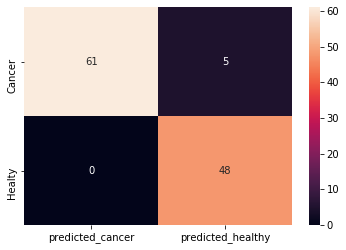

In [29]:
sns.heatmap(confusion, annot=True,fmt="d")

In [30]:
print(classification_report(y_test, predictions_new))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        48
         1.0       1.00      0.92      0.96        66

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## After using normalization, 
## We can see our model is predicting pretty well with an Accuracy of .96

-------------------------------------------------------------------------------------------------------------------

# Improving model further using Gribsearch model

# Gridsearch Model

## Searching for the best hyperparameters

In [37]:
p_grid = {'C':[0.01,0.1, 1, 10, 100], 'gamma': [10,1,0.1,0.01,0.001], 'kernel': ['rbf']}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid = GridSearchCV(SVC(), p_grid, refit=True, verbose = 4)

In [40]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] .

[CV] ......... C=100, gamma=10, kernel=rbf, score=0.868, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.945, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.912, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

## Let's now explore and see best parameters, and print out the "grid"

In [41]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [42]:
print(grid.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Now we have the best parameters as: 'C' = 10  , 'gamma'= 0.1 and 'kernel' = 'rbf'

## Prediction's Using grid

In [43]:
predictions_grid = grid.predict(X_test_scaled)

In [44]:
Conf_matrix = np.array(confusion_matrix(y_test, predictions_grid, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Cancer','healthy'],
                        columns = ['predicted_cancer', 'predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
Cancer,61,5
healthy,0,48


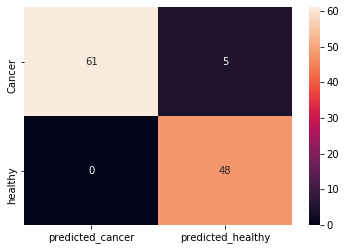

In [45]:
sns.heatmap(confusion, annot=True,fmt="d")

In [46]:
print(classification_report(y_test, predictions_new))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        48
         1.0       1.00      0.92      0.96        66

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

